<a href="https://colab.research.google.com/github/awnginga/Engage-Project/blob/main/Copy_of_Data_Wrangling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Specific learning outcomes
By the end of this topic the learner should be able to:

1. Examine the given dataset to uncover outliers, missing values and patterns that affect data interpretation.
2. Prepare different types of data sets in readiness for analysis

# Data Cleaning

## Introduction
Data cleaning is an essential step in the data analysis process. It involves preparing the data for analysis by addressing various issues that could affect the quality and reliability of the results. This includes handling missing values, correcting data types, dealing with out-of-range values, and ensuring the consistency and accuracy of the data. The goal is to create a clean dataset that accurately represents the underlying phenomena and can be used confidently for subsequent analysis steps.

In this module, we will use the NHANES dataset to demonstrate common data cleaning techniques. We will insert some errors into the original data file to illustrate these techniques. The cleaned data will be exported for further analysis.


In [1]:
import pandas as pd

# Load the NHANES dataset
df = pd.read_csv('/content/Child health data Practice.csv')

# Display the first few rows of the dataframe
df.head()

,Child participated in POLIO campaign August 2013,diarrhea_status,weight,Height,residence,Sex,age,age_category,education,wealth_index
0,1,No,16.2,102.4,Rural,Female,45,36-47,Secondary+,Richest
1,1,No,13.5,92.5,Rural,Male,45,36-47,Primary,Second
2,1,No,13.4,88.5,Rural,Male,36,36-47,Primary,Fourth
3,1,No,15.0,101.3,Rural,Female,51,48-59,Primary,Fourth
4,1,No,15.2,105.0,Rural,Female,56,48-59,Primary,Fourth


# Data Cleaning / Identifying Inconsistencies

Identify inconsistencies in the dataset.

The data information will show us the structure of the dataframe, including the column names, non-null counts, and data types.

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 799 entries, 0 to 798
Data columns (total 10 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   Child participated in POLIO campaign August 2013  799 non-null    int64  
 1    diarrhea_status                                  799 non-null    object 
 2   weight                                            799 non-null    float64
 3   Height                                            799 non-null    float64
 4   residence                                         799 non-null    object 
 5   Sex                                               799 non-null    object 
 6   age                                               799 non-null    int64  
 7   age_category                                      799 non-null    object 
 8   education                                         768 non-null    object 
 9   wealth_index         

# Introduce some dirt into the data

- Dirtify gender by adding some gender values e.g M/f/m/F
- Add 'cm' to height
- replace some values in the sleep hours night column with unusually high values

In [3]:
df.loc[1:10, 'Gender'] = ['M','m','F','f','Female','M','Female','Male','m','F']
df['Gender'].value_counts()

,count
Gender,
nan,789
M,2
m,2
F,2
Female,2
f,1
Male,1


In [4]:
# Adding units (cm) to "Height" and storing it in a new column: "Height_cm"
df['Height_cm'] = df['Height'].astype(str) + 'cm'

# Displaying the first few rows to verify the new column
df[['Height', 'Height_cm']].head()

,Height,Height_cm
0,102.4,102.4cm
1,92.5,92.5cm
2,88.5,88.5cm
3,101.3,101.3cm
4,105.0,105.0cm


In [5]:
df.drop('Height',axis='columns',inplace=True)

### Cleaning the dirtified entries

In [6]:
df['Height_cm'] = pd.to_numeric(df['Height_cm'].str.replace('cm',''), errors='coerce')
df['Height_cm'].describe()

,Height_cm
count,799.000000
mean,83.858573
std,13.795704
min,45.000000
25%,74.000000
50%,84.900000
75%,93.850000
max,124.800000


In [7]:
df['Height_cm'].dropna().mean()

83.85857321652065

In [8]:
# create a dictionary map to clean gender category
gender_dict = {
    'female':'female',
    'male':'male',
    'Female':'female',
    'Male':'male',
    'm': 'male',
    'M': 'male',
    'f': 'female',
    'F': 'female'
}

df['Gender'].map(gender_dict).value_counts()

,count
Gender,
male,5
female,5


# Convert Columns to Appropriate Data Types

Convert columns to the correct data types.

This step is important to ensure that data is in the correct format for analysis.

In [10]:
df['education'] = df['education'].astype('category')
#df['SurveyYr'] = df['SurveyYr'].astype('category')
df['Gender'] = df['Gender'].astype('category')
#df['MaritalStatus'] = df['MaritalStatus'].astype('category')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 799 entries, 0 to 798
Data columns (total 11 columns):
 #   Column                                            Non-Null Count  Dtype   
---  ------                                            --------------  -----   
 0   Child participated in POLIO campaign August 2013  799 non-null    int64   
 1    diarrhea_status                                  799 non-null    object  
 2   weight                                            799 non-null    float64 
 3   residence                                         799 non-null    object  
 4   Sex                                               799 non-null    object  
 5   age                                               799 non-null    int64   
 6   age_category                                      799 non-null    object  
 7   education                                         768 non-null    category
 8   wealth_index                                      799 non-null    object  
 9   Gender    

# Display a Peek of the Data

Show the first few rows of the dataset.

In [11]:
df.head()

,Child participated in POLIO campaign August 2013,diarrhea_status,weight,residence,Sex,age,age_category,education,wealth_index,Gender,Height_cm
0,1,No,16.2,Rural,Female,45,36-47,Secondary+,Richest,nan,102.4
1,1,No,13.5,Rural,Male,45,36-47,Primary,Second,M,92.5
2,1,No,13.4,Rural,Male,36,36-47,Primary,Fourth,m,88.5
3,1,No,15.0,Rural,Female,51,48-59,Primary,Fourth,F,101.3
4,1,No,15.2,Rural,Female,56,48-59,Primary,Fourth,f,105.0


# Summary of the Data

Show descriptive statistics for numerical columns and class distributions for categorical columns.

In [12]:
df.describe(include='all')

,Child participated in POLIO campaign August 2013,diarrhea_status,weight,residence,Sex,age,age_category,education,wealth_index,Gender,Height_cm
count,799.000000,799,799.000000,799,799,799.000000,799,768,799,799,799.000000
unique,NaN,3,NaN,2,2,NaN,6,2,5,7,NaN
top,NaN,No,NaN,Rural,Male,NaN,36-47,Primary,Poorest,nan,NaN
freq,NaN,704,NaN,453,401,NaN,196,476,197,789,NaN
mean,1.234043,NaN,11.591114,NaN,NaN,29.314143,NaN,NaN,NaN,NaN,83.858573
std,0.850500,NaN,3.408729,NaN,NaN,16.839659,NaN,NaN,NaN,NaN,13.795704
min,1.000000,NaN,3.100000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,45.000000
25%,1.000000,NaN,9.200000,NaN,NaN,15.000000,NaN,NaN,NaN,NaN,74.000000
50%,1.000000,NaN,11.700000,NaN,NaN,31.000000,NaN,NaN,NaN,NaN,84.900000
75%,1.000000,NaN,14.100000,NaN,NaN,43.000000,NaN,NaN,NaN,NaN,93.850000


# Boxplots to Identify Outliers

Use boxplots to visualize outliers in various columns.

KeyError: "['Poverty', 'Weight', 'BMI', 'BMI_WHO', 'DirectChol'] not in index"

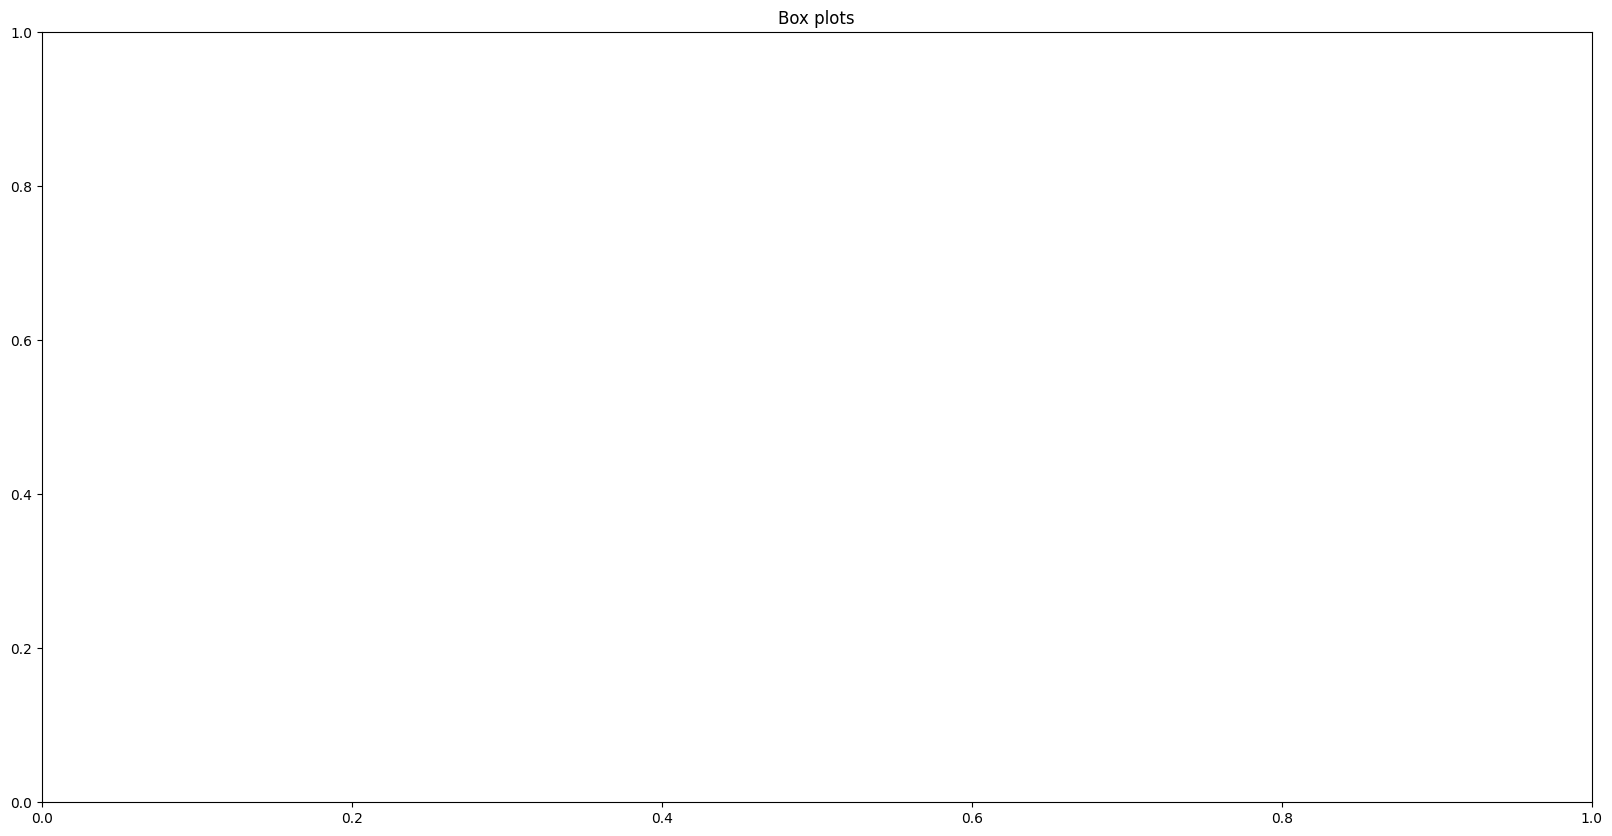

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

columns_for_boxplots = ['Poverty','Weight','Height_cm', 'BMI', 'BMI_WHO','DirectChol']
plt.figure(figsize=(20, 10))
plt.title('Box plots')
sns.boxplot(data=df[columns_for_boxplots].dropna())
plt.xticks(rotation=90)
plt.show()
plt.show()

# Histograms to Show Distribution of Numeric Columns

Use histograms to visualize the distribution of various numeric columns.

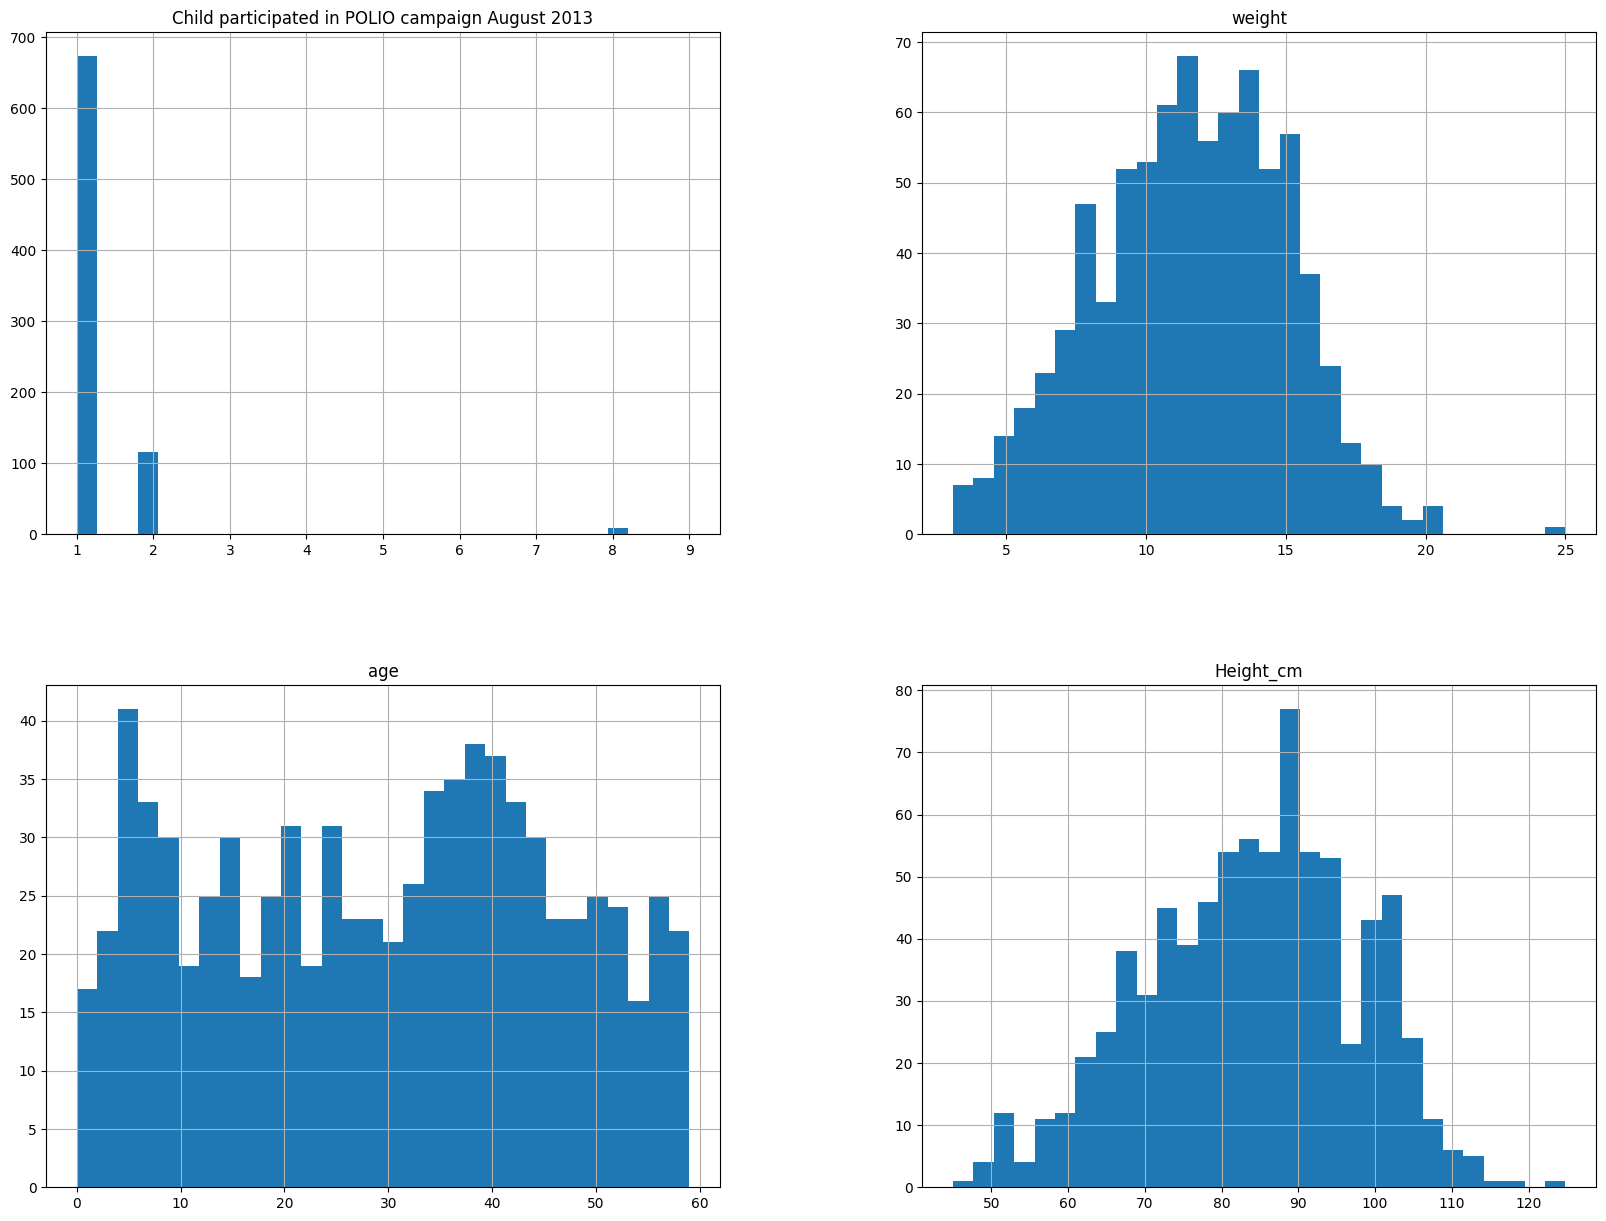

In [14]:
df.hist(figsize=(20, 15), bins=30)
plt.show()

# Bar Plots and Pie Charts for Categorical Columns

Use bar plots and pie charts to show the distribution of various categorical columns.

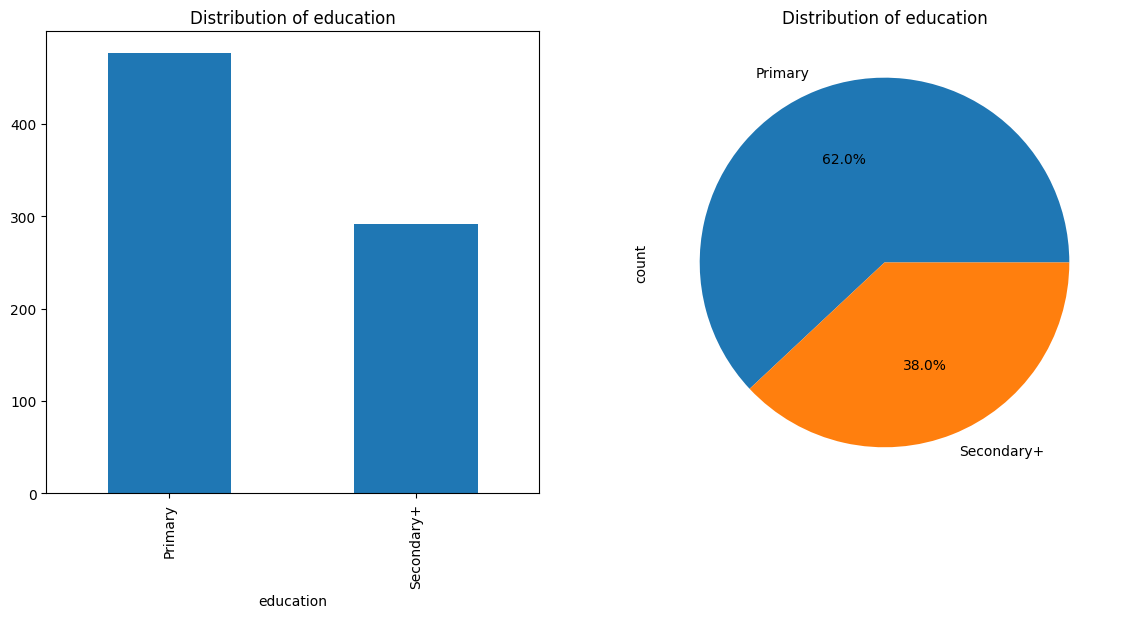

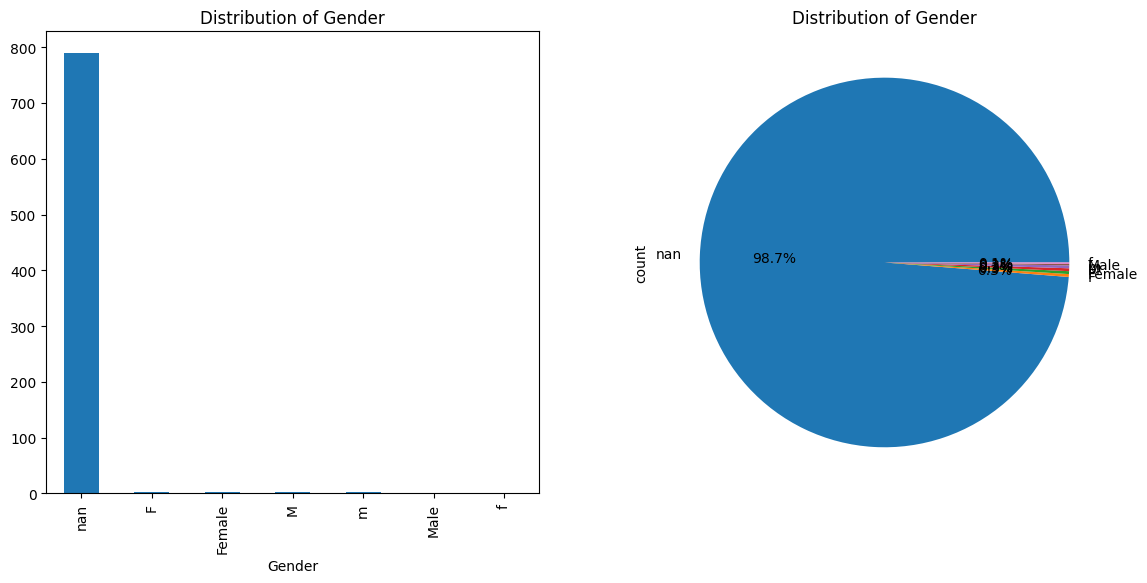

In [15]:
for column in df.select_dtypes(include=['category']).columns:
    fig, axes = plt.subplots(1, 2, figsize=(14, 6))
    df[column].value_counts().plot(kind='bar', ax=axes[0], title=f'Distribution of {column}')
    df[column].value_counts().plot(kind='pie', ax=axes[1], autopct='%1.1f%%', title=f'Distribution of {column}')
    plt.show()

# Check for Duplicate Rows

Identify and display duplicate rows in the dataset.

In [16]:
duplicates = df[df.duplicated()]
duplicates

,Child participated in POLIO campaign August 2013,diarrhea_status,weight,residence,Sex,age,age_category,education,wealth_index,Gender,Height_cm


# Unique Entries

Use columns ID and SurveyYr to identify unique entries.

In [17]:
unique_entries = df.drop_duplicates(subset=['ID', 'SurveyYr'])
unique_entries

KeyError: Index(['SurveyYr', 'ID'], dtype='object')

# Category Collapsing

Collapse education column where entry mentions 'college' into one category 'college'.

In [ ]:
df['Education'] = df['Education'].str.replace(r'.*college.*', 'college', case=False)
df['Education'] = df['Education'].astype('category')

# Heatmap of Missing Values

Visualize the distribution of missing values across columns.

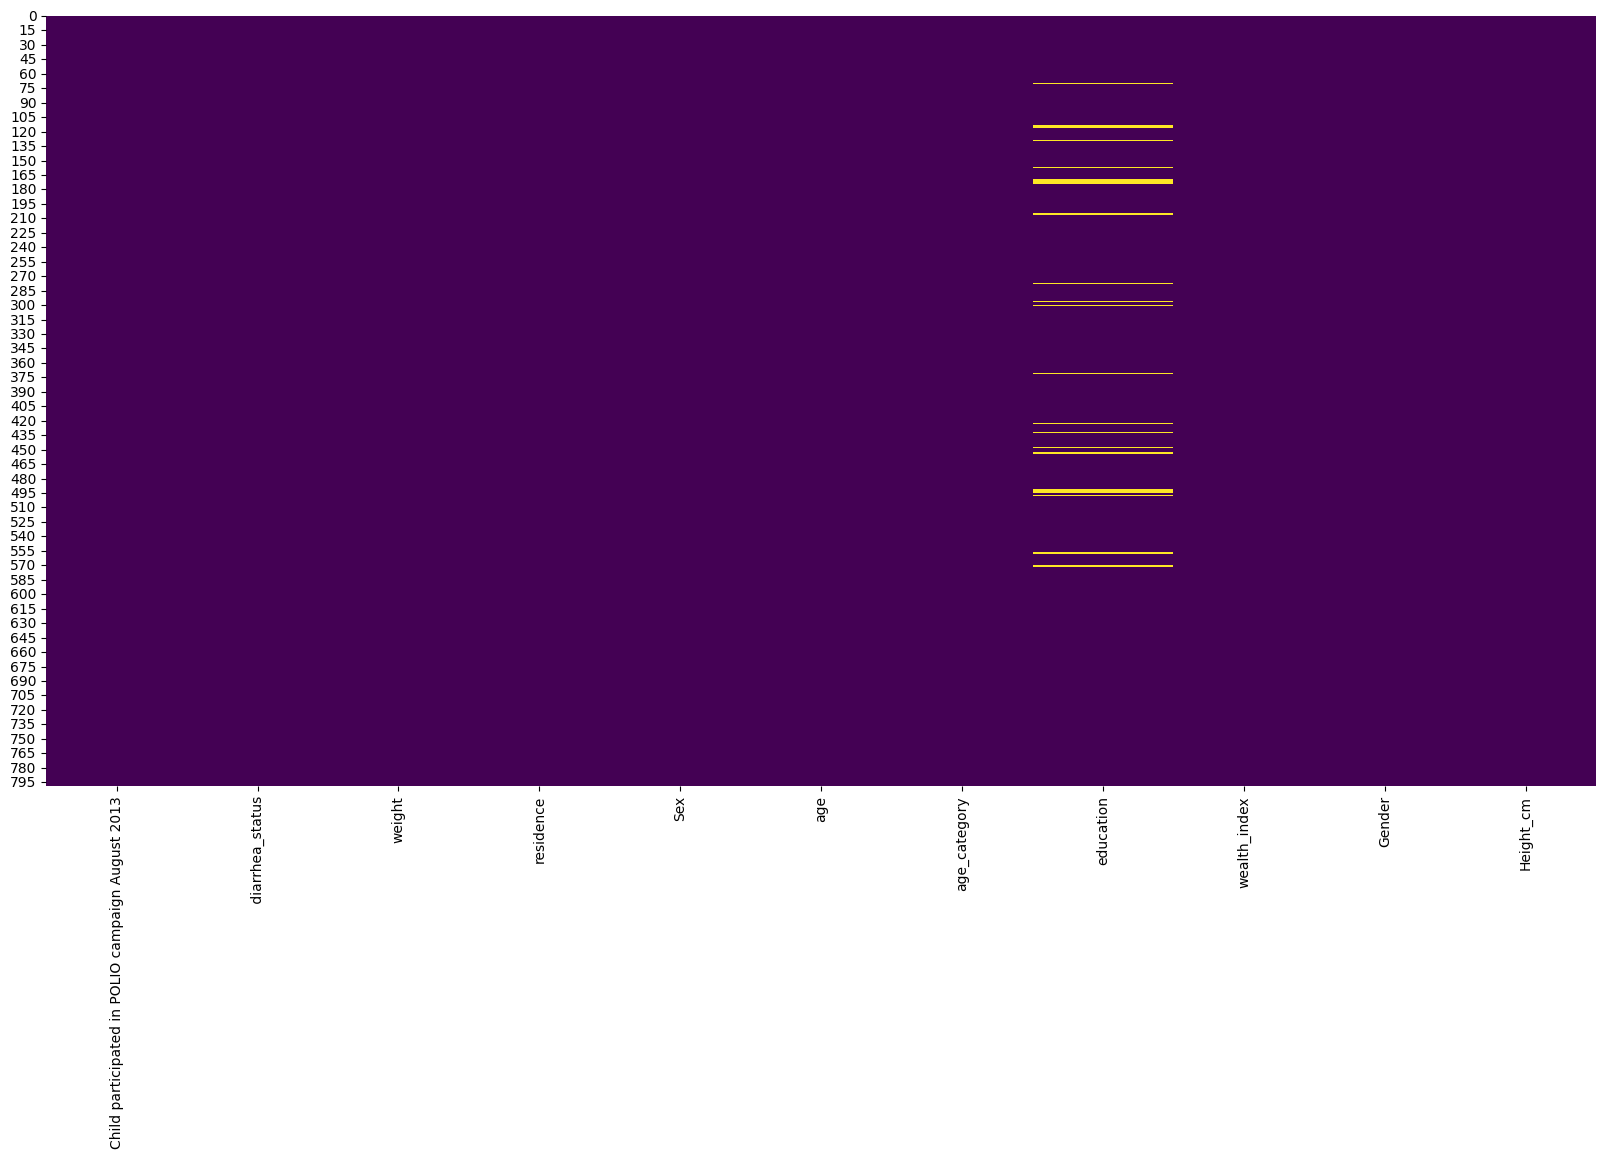

In [18]:
plt.figure(figsize=(20, 10))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.show()

# Subset Relevant Columns

Select a subset of columns relevant for further analysis.

In [ ]:
subset_df = df[['ID', 'SurveyYr', 'Gender', 'Age', 'Education', 'MaritalStatus', 'Height_cm', 'Weight', 'BMI', 'SleepHrsNight','HHIncome','Work']]
subset_df.head()

,ID,SurveyYr,Gender,Age,Education,MaritalStatus,Height_cm,Weight,BMI,SleepHrsNight,HHIncome,Work
0,51624,2009_10,male,34,High School,Married,164.7,87.4,32.22,4.0,25000-34999,NotWorking
1,51625,2009_10,M,4,NaN,NaN,105.4,17.0,15.30,NaN,20000-24999,NaN
2,51630,2009_10,m,49,Some College,LivePartner,168.4,86.7,30.57,8.0,35000-44999,NotWorking
3,51638,2009_10,F,9,NaN,NaN,133.1,29.8,16.82,NaN,75000-99999,NaN
4,51646,2009_10,f,8,NaN,NaN,130.6,35.2,20.64,NaN,55000-64999,NaN


# Export Cleaned Dataset

Create a CSV file with the cleaned dataset.

In [ ]:
subset_df.to_csv('nhanes_reduced.csv', index=False)